<a href="https://colab.research.google.com/github/rayoo22/DEEP-LEARNING-PROJECT/blob/main/cnn_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE

In [101]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [102]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_images_flat = train_images.reshape((60000, -1)).astype('float32') / 255
print(train_images_flat.shape)

(60000, 784)


In [103]:
subset_size = 2000  # Adjust for computational feasibility
train_images_subset = train_images_flat[:subset_size]
train_labels_subset = train_labels[:subset_size]

# Apply t-SNE to the subset
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
train_tsne = tsne.fit_transform(train_images_subset)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


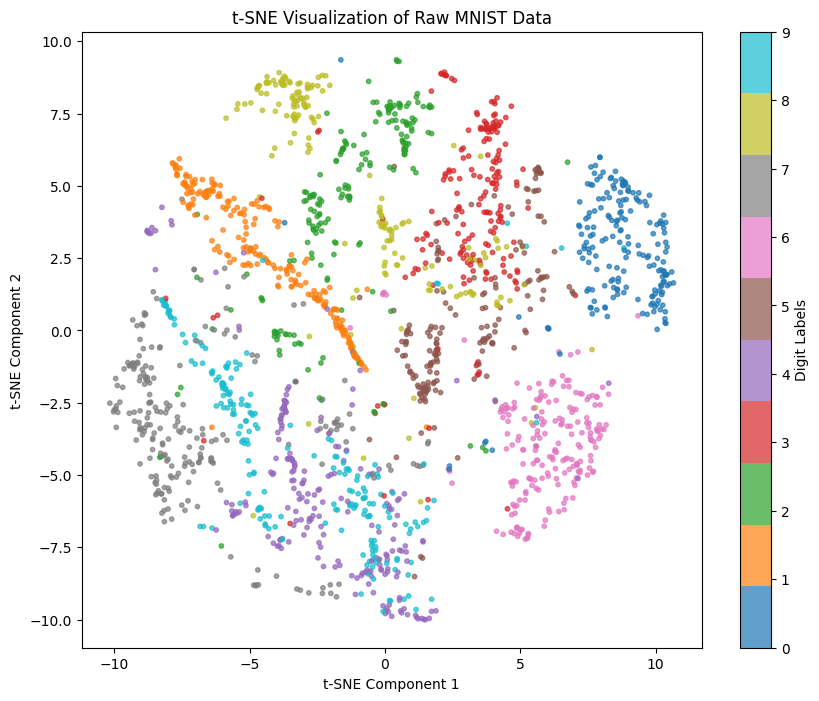

In [104]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_labels_subset, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Digit Labels')
plt.title('t-SNE Visualization of Raw MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [105]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [106]:
from keras import layers
from keras import models

# we instantiate the Sequential model
model = models.Sequential()

# the input is a 28x28x1
# the first conv layers will apply 32 filters of 3x3 scale, and
# the output as a 26x26x32
# then followed by a 2x2 Max Pooling which reduces the size of input
# this is because the neighboring pixels tend to have similar values
# we use a 2x2 scale which halves the 26x26 to 13x13
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.8518 - loss: 0.4739 - val_accuracy: 0.9758 - val_loss: 0.0772
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9826 - loss: 0.0582 - val_accuracy: 0.9869 - val_loss: 0.0440
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9878 - loss: 0.0386 - val_accuracy: 0.9837 - val_loss: 0.0547
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9891 - val_loss: 0.0388
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9926 - loss: 0.0222 - val_accuracy: 0.9890 - val_loss: 0.0379
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9943 - loss: 0.0167 - val_accuracy: 0.9893 - val_loss: 0.0376
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9883 - val_loss: 0.0434
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9952 - loss: 0.0143 - 

In [109]:
scores = model.evaluate(train_images, train_labels, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9976666569709778 
 Error: 0.23333430290222168


In [110]:
import matplotlib.pyplot as plt
import numpy as np
# Get predictions (class probabilities)
predictions = model.predict(test_images)  # Shape: (num_samples, num_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [111]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

In [112]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


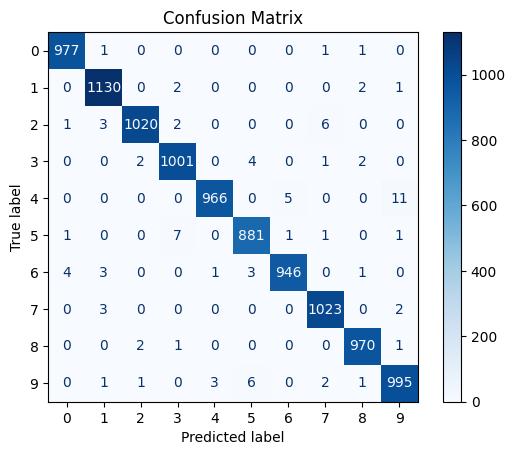

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [114]:
from sklearn.metrics import classification_report

# Generate and display classification report
report = classification_report(true_labels, predicted_labels, target_names=[f"Class {i}" for i in range(10)])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       980
     Class 1       0.99      1.00      0.99      1135
     Class 2       1.00      0.99      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       1.00      0.98      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      1.00      0.99      1028
     Class 8       0.99      1.00      0.99       974
     Class 9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



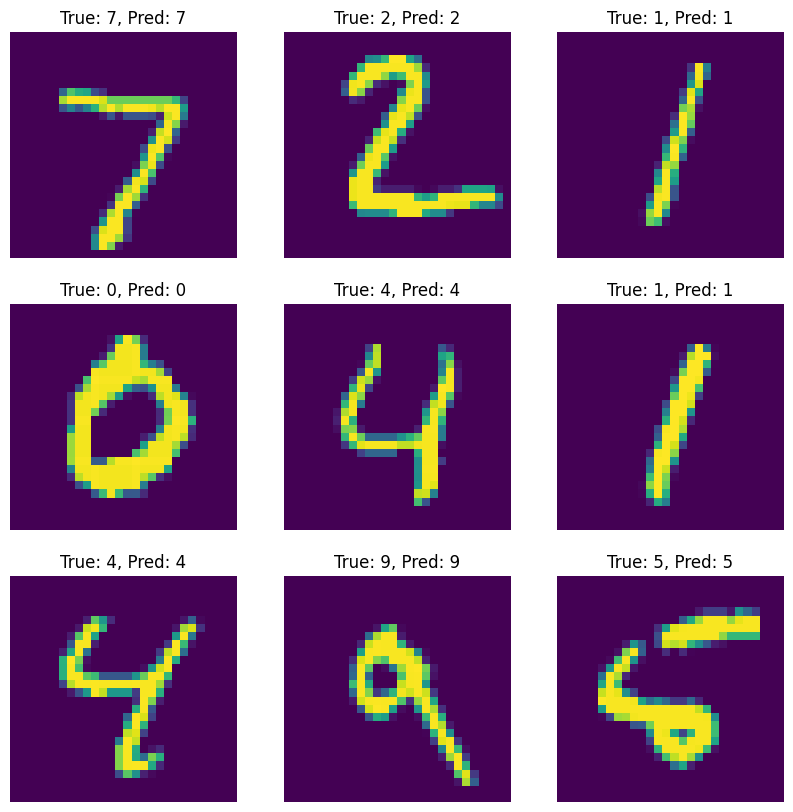

In [115]:
correct_indices = np.where(predicted_labels == true_labels)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(correct_indices[:9]):  # Show first 9 correct predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28, 1))  # Adjust for CIFAR-10 shape
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')
plt.show()

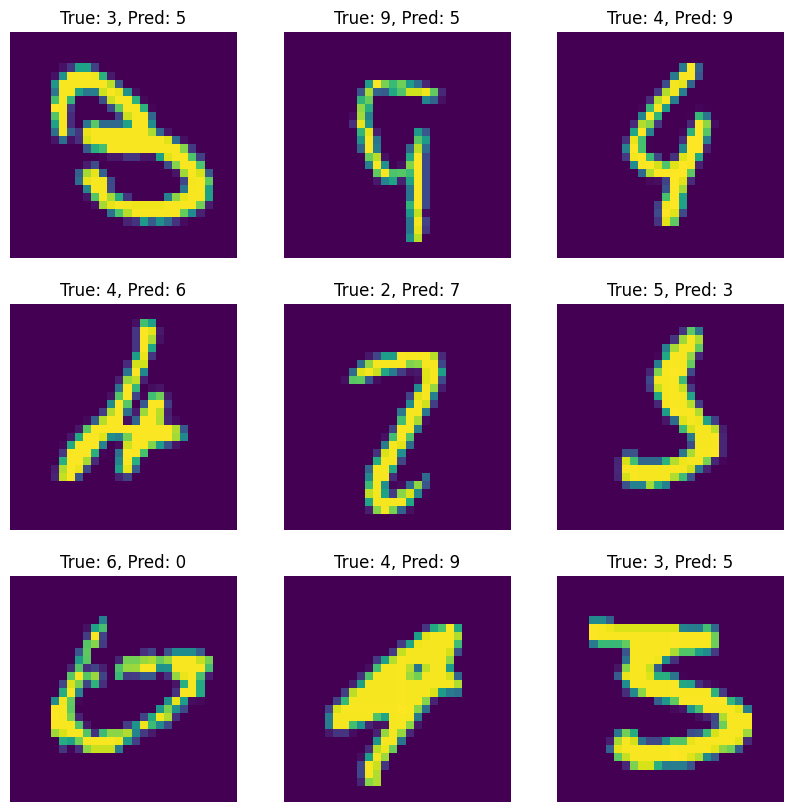

In [116]:
incorrect_indices = np.where(predicted_labels != true_labels)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:9]):  # Show first 9 incorrect predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28, 1))  # Adjust for CIFAR-10 shape
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')
plt.show()

In [117]:
from tensorflow.keras.metrics import top_k_categorical_accuracy
# Define a top-k metric
def top_k_accuracy(y_true, y_pred, k=3):
    return top_k_categorical_accuracy(y_true, y_pred, k=k).numpy().mean()

# Calculate top-3 accuracy
top3_acc = top_k_accuracy(test_labels, predictions, k=3)
print(f"Top-3 Accuracy: {top3_acc:.2f}")

Top-3 Accuracy: 1.00


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


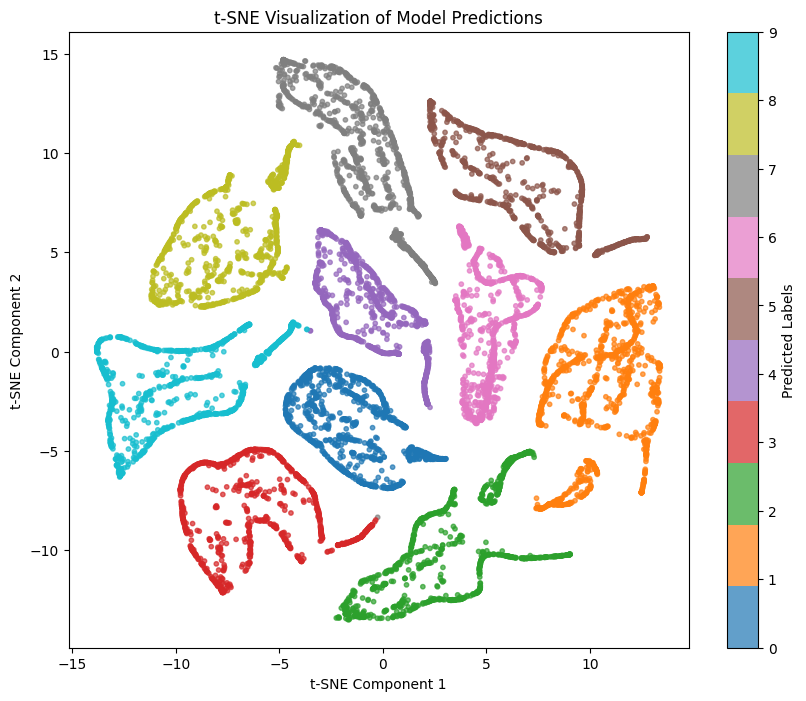

In [118]:
import numpy as np
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
test_tsne = tsne.fit_transform(predictions)

# Get the actual labels or predicted labels for coloring
predicted_labels = np.argmax(predictions, axis=1)

# Visualize the t-SNE embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_tsne[:, 0], test_tsne[:, 1], c=predicted_labels, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Predicted Labels')
plt.title('t-SNE Visualization of Model Predictions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

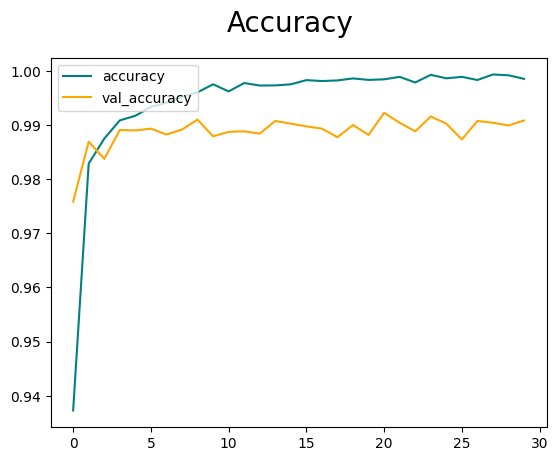

In [119]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

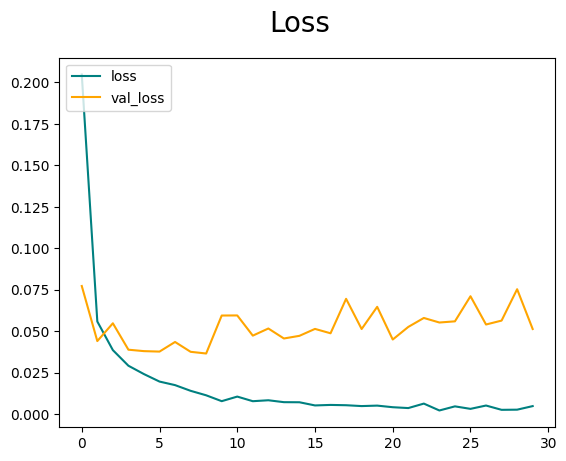

In [120]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()